# Boston Housing Exercise - Polynomial Regression

**Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression**

# Data Mining

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Boston.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum().sort_values()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [7]:
df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [8]:
# New column price
df['price'] = df['medv']*1000
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36200.0


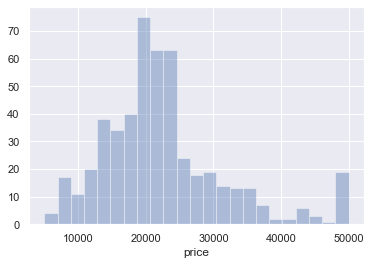

In [9]:
sns.distplot(df['price'], kde=False);

In [10]:
#sns.pairplot(df);

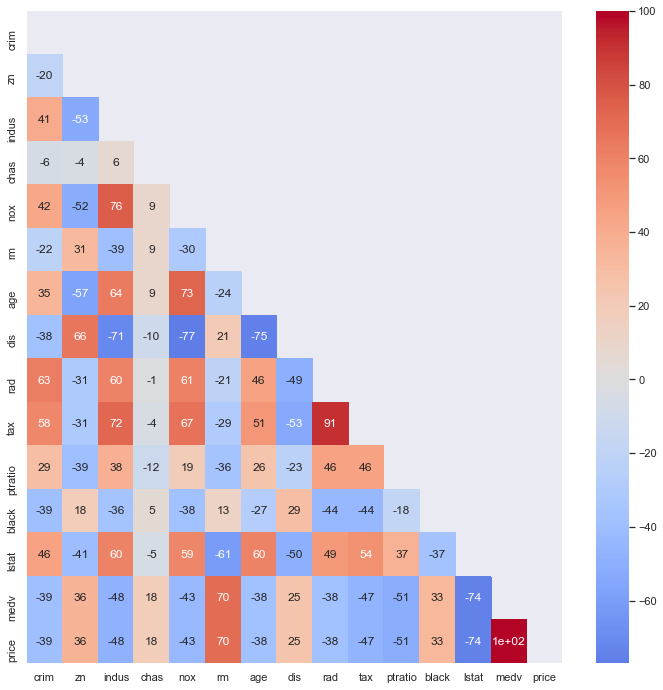

In [11]:
plt.figure(figsize=(12,12))
mask = np.triu(df.corr())
ax = sns.heatmap(round(df.corr()*100)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,center=0)
                 

In [12]:
# price, rm, lstat

# Lineare Regression

In [13]:
X = df.iloc[:, 5:6].values
#X = X[:, np.newaxis]
X.shape

(506, 1)

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

R2: 0.5721625318143686
RMSE 5950.260950477573


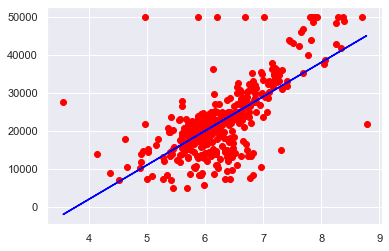

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

plt.scatter(X_train, y_train, color='red');
plt.plot(X_train, y_pred, color='blue');

r2 = r2_score(y_test, lin_reg.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
print('R2:', r2 )
print('RMSE', rmse)

## Polynomial Fit

R2: 0.6774539061087048
RMSE 5166.453178498839


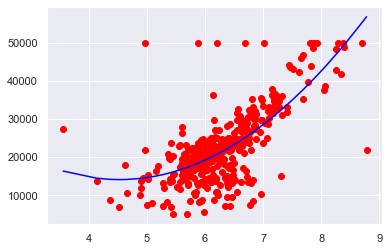

In [16]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


plt.scatter(X_train, y_train, color='red');

sorted_zip = sorted(zip(X_train, pol_reg.predict(X_poly)))
X_train_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train_sort, y_poly_pred, color='blue');

r2 = r2_score(y_test, pol_reg.predict(X_poly_test))
rmse = np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('R2:', r2 )
print('RMSE', rmse)

## More Features

In [17]:
X2 = df.ix[:, ['rm', 'lstat']].values
#X = X[:, np.newaxis]
X2.shape

(506, 2)

In [18]:
y2 = df.price
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=3)

In [19]:
poly_reg_2 = PolynomialFeatures(degree=3)
X2_poly = poly_reg_2.fit_transform(X2_train)
X2_poly_test = poly_reg_2.fit_transform(X2_test)
pol_reg_2 = LinearRegression()
pol_reg_2.fit(X2_poly, y2_train)

r2_2 = r2_score(y2_test, pol_reg_2.predict(X2_poly_test))
rmse_2 = np.sqrt(mean_squared_error(y2_test, pol_reg_2.predict(X2_poly_test)))
print('R2:', r2_2)
print('RMSE', rmse_2)

R2: 0.8598147617966287
RMSE 3406.0243342461167


## Ridge and Lasso and Elastic Net 

### Ridge Regression

In [20]:
X3 = df[['rm', 'lstat']].values
X3

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [22]:
y3 = df.price
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=3)

In [23]:
poly_reg_3 = PolynomialFeatures(degree=3)
X3_poly = poly_reg_3.fit_transform(X3_train)
X3_poly_test = poly_reg_3.fit_transform(X3_test)

rr = Ridge(alpha=0.01)
rr.fit(X3_poly, y3_train)
pred_train_rr = rr.predict(X3_poly)

r2_3 = r2_score(y3_test, rr.predict(X3_poly_test))
rmse_3 = np.sqrt(mean_squared_error(y3_test, rr.predict(X3_poly_test)))
print('R2:', r2_3)
print('RMSE', rmse_3)

R2: 0.8585551091426581
RMSE 3421.2927487507686


### Lasso Regression 

In [24]:
ll = Lasso(alpha=0.01)
ll.fit(X3_poly, y3_train)
pred_train_ll = ll.predict(X3_poly)

r2_4 = r2_score(y3_test, ll.predict(X3_poly_test))
rmse_4 = np.sqrt(mean_squared_error(y3_test, ll.predict(X3_poly_test)))
print('R2:', r2_4)
print('RMSE', rmse_4)

R2: 0.8526038511160308
RMSE 3492.5262000469847


### ElasticNet

In [25]:
en = ElasticNet(alpha=0.01, l1_ratio=0)
en.fit(X3_poly, y3_train)
pred_train_en = en.predict(X3_poly)

r2_5 = r2_score(y3_test, en.predict(X3_poly_test))
rmse_5 = np.sqrt(mean_squared_error(y3_test, en.predict(X3_poly_test)))
print('R2:', r2_5)
print('RMSE', rmse_5)

R2: 0.8518849446693215
RMSE 3501.033021746441


In [26]:
df_new = df.drop(['price', 'medv'], axis=1)
y4 = df.price
X4 = df_new

In [27]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=3)

In [37]:
poly_reg_all = PolynomialFeatures(degree=2)
X4_poly = poly_reg_all.fit_transform(X4_train)
X4_poly_test = poly_reg_all.fit_transform(X4_test)

ll_all = Lasso(alpha=0.7)
ll_all.fit(X4_poly, y4_train)

pred_train_ll_all = ll_all.predict(X4_poly)

r2_6 = r2_score(y4_test, ll_all.predict(X4_poly_test))
rmse_6 = np.sqrt(mean_squared_error(y4_test, ll_all.predict(X4_poly_test)))
print('R2:', r2_6)
print('RMSE', rmse_6)

R2: 0.8607305449606654
RMSE 3394.8808977904373
